In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
dengue = pd.read_csv('datasets\\dengue.csv')
dengue.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>1. Do dengue cases increase or decrease over the years?</h1>

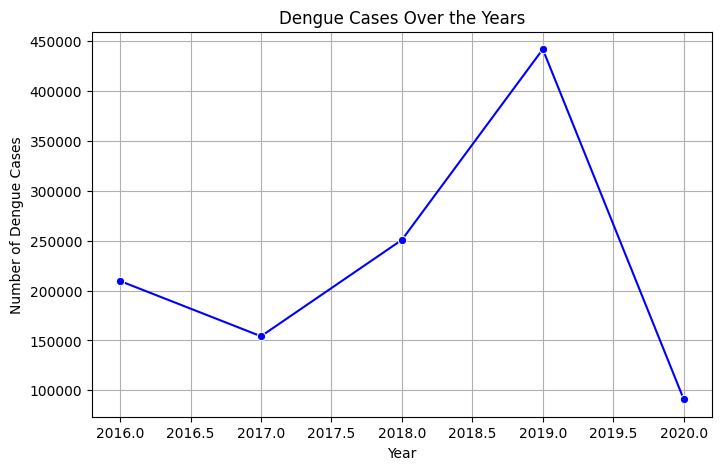

In [10]:
cases_per_year = dengue_data.groupby('Year')['Dengue_Cases'].sum()

plt.figure(figsize=(8, 5))
sns.lineplot(x=cases_per_year.index, y=cases_per_year.values, marker='o', color='b')
plt.title("Dengue Cases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Dengue Cases")
plt.grid()
plt.show()

<h1>2. Do dengue-related deaths increase or decrease over the years?</h1>

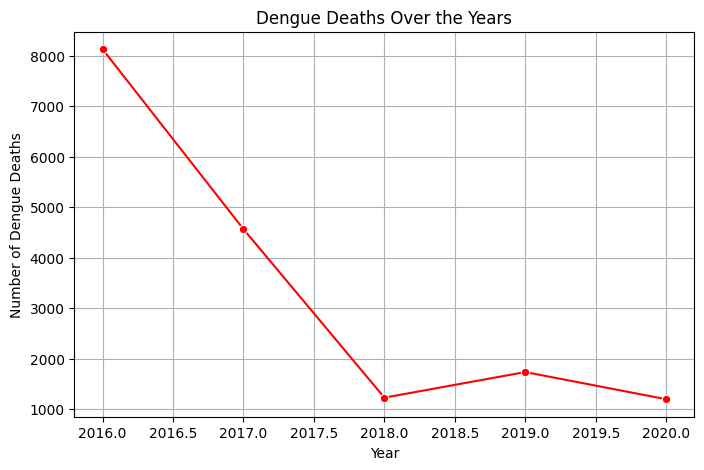

In [11]:
deaths_per_year = dengue_data.groupby('Year')['Dengue_Deaths'].sum()

plt.figure(figsize=(8, 5))
sns.lineplot(x=deaths_per_year.index, y=deaths_per_year.values, marker='o', color='r')
plt.title("Dengue Deaths Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Dengue Deaths")
plt.grid()
plt.show()

<h1>3. Which region has the highest number of dengue cases?</h1>

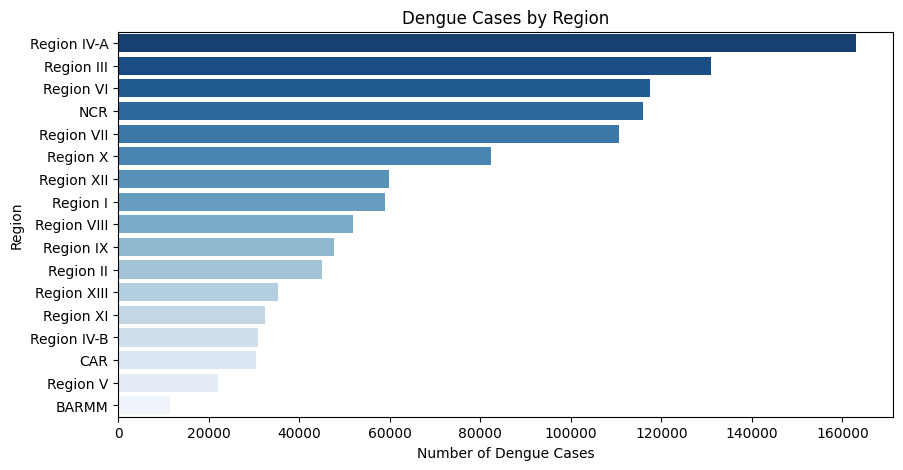

In [12]:
cases_per_region = dengue_data.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=cases_per_region.values, y=cases_per_region.index, palette='Blues_r')
plt.title("Dengue Cases by Region")
plt.xlabel("Number of Dengue Cases")
plt.ylabel("Region")
plt.show()

<h1>4. Which region has the highest number of dengue deaths?</h1>

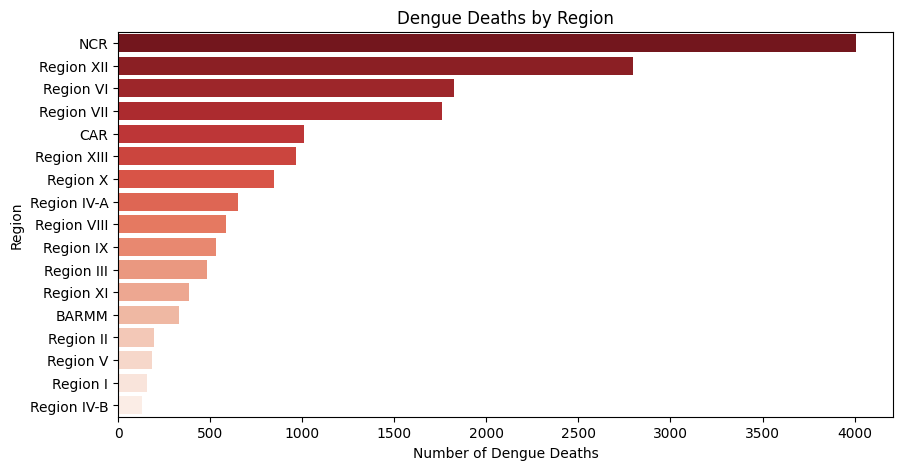

In [13]:
deaths_per_region = dengue_data.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=deaths_per_region.values, y=deaths_per_region.index, palette='Reds_r')
plt.title("Dengue Deaths by Region")
plt.xlabel("Number of Dengue Deaths")
plt.ylabel("Region")
plt.show()

<h1>5. Which month is more likely to have dengue cases?</h1>

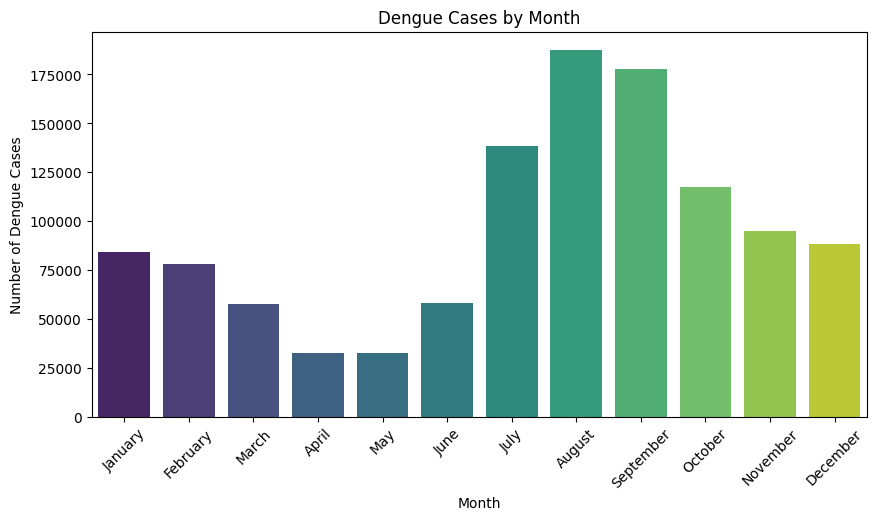

In [15]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dengue_data['Month'] = pd.Categorical(dengue_data['Month'], categories=month_order, ordered=True)
cases_per_month = dengue_data.groupby('Month')['Dengue_Cases'].sum().reindex(month_order)
plt.figure(figsize=(10, 5))
sns.barplot(x=cases_per_month.index, y=cases_per_month.values, palette='viridis')
plt.title("Dengue Cases by Month")
plt.xlabel("Month")
plt.ylabel("Number of Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h1>6. Is there a seasonal pattern in dengue cases?</h1>

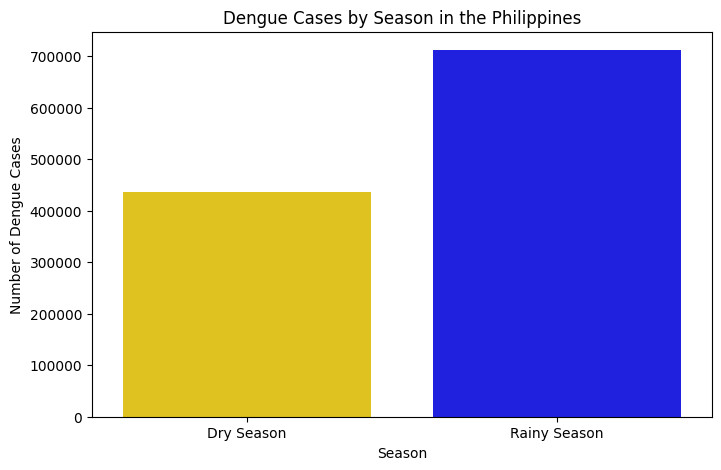

In [17]:
season_map_ph = {
    'January': 'Dry Season', 'February': 'Dry Season', 'March': 'Dry Season', 'April': 'Dry Season',
    'May': 'Rainy Season', 'June': 'Rainy Season', 'July': 'Rainy Season', 'August': 'Rainy Season',
    'September': 'Rainy Season', 'October': 'Rainy Season', 'November': 'Dry Season', 'December': 'Dry Season'
}

dengue_data['Season'] = dengue_data['Month'].map(season_map_ph)

cases_per_season = dengue_data.groupby('Season')['Dengue_Cases'].sum().reindex(['Dry Season', 'Rainy Season'])
plt.figure(figsize=(8, 5))
sns.barplot(x=cases_per_season.index, y=cases_per_season.values, palette=['gold', 'blue'])
plt.title("Dengue Cases by Season in the Philippines")
plt.xlabel("Season")
plt.ylabel("Number of Dengue Cases")
plt.show()


<h1>7. Which year experienced the highest case fatality rate? (Deaths per Cases)</h1>

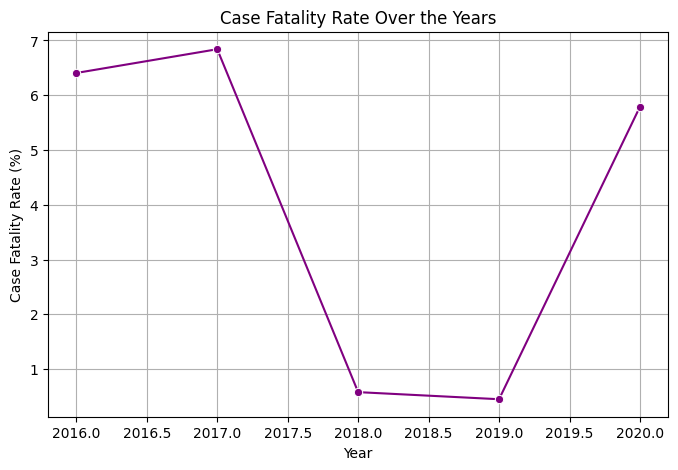

In [18]:
dengue_data['CFR'] = (dengue_data['Dengue_Deaths'] / dengue_data['Dengue_Cases']) * 100
cfr_per_year = dengue_data.groupby('Year')['CFR'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=cfr_per_year.index, y=cfr_per_year.values, marker='o', color='purple')
plt.title("Case Fatality Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Case Fatality Rate (%)")
plt.grid()
plt.show()

<h1>8. Are there any regions with consistently low or high case fatality rates?</h1>

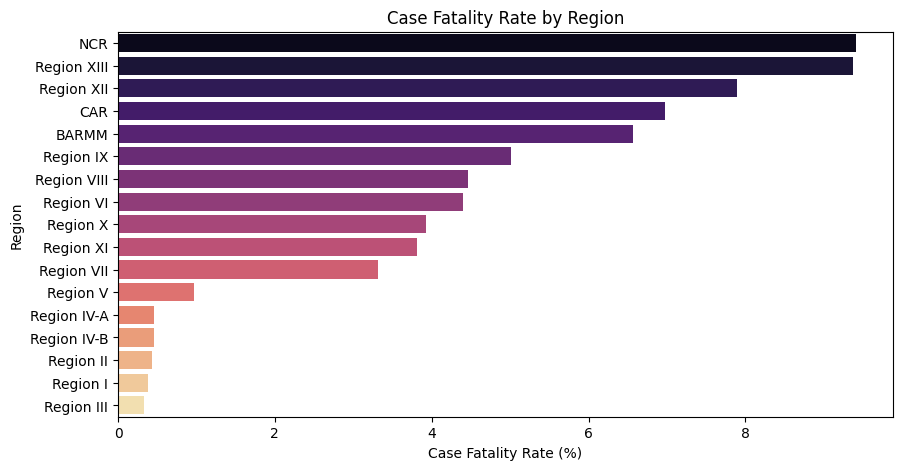

In [19]:
cfr_per_region = dengue_data.groupby('Region')['CFR'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=cfr_per_region.values, y=cfr_per_region.index, palette='magma')
plt.title("Case Fatality Rate by Region")
plt.xlabel("Case Fatality Rate (%)")
plt.ylabel("Region")
plt.show()


<h1>9. Are there significant spikes in dengue cases in certain regions?</h1>

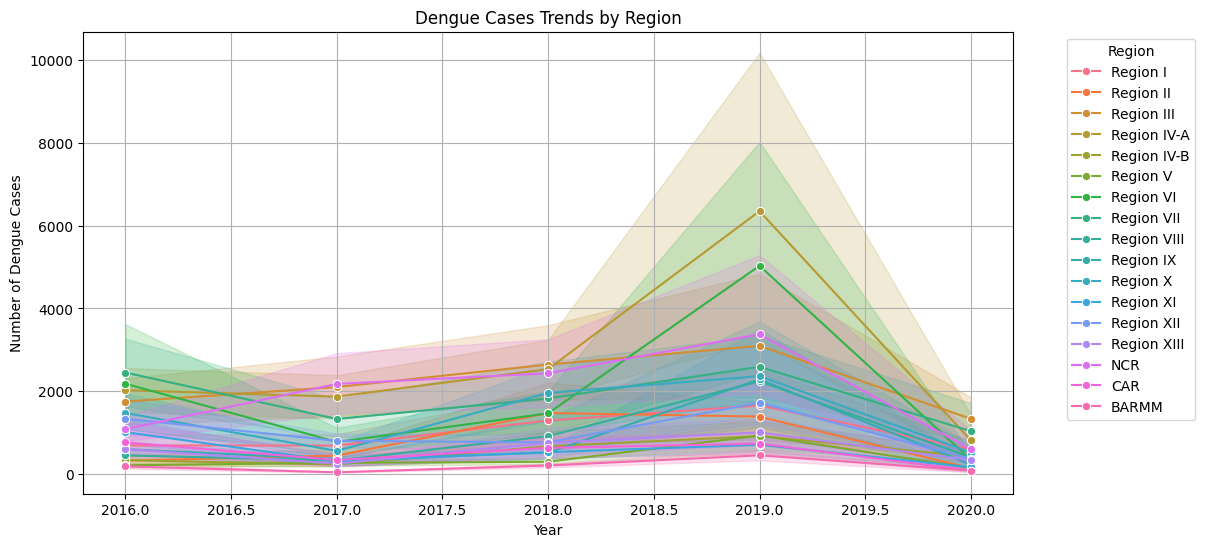

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dengue_data, x='Year', y='Dengue_Cases', hue='Region', marker='o')
plt.title("Dengue Cases Trends by Region")
plt.xlabel("Year")
plt.ylabel("Number of Dengue Cases")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

<h1>10. Are there any regions where dengue deaths increased despite fewer cases?</h1>

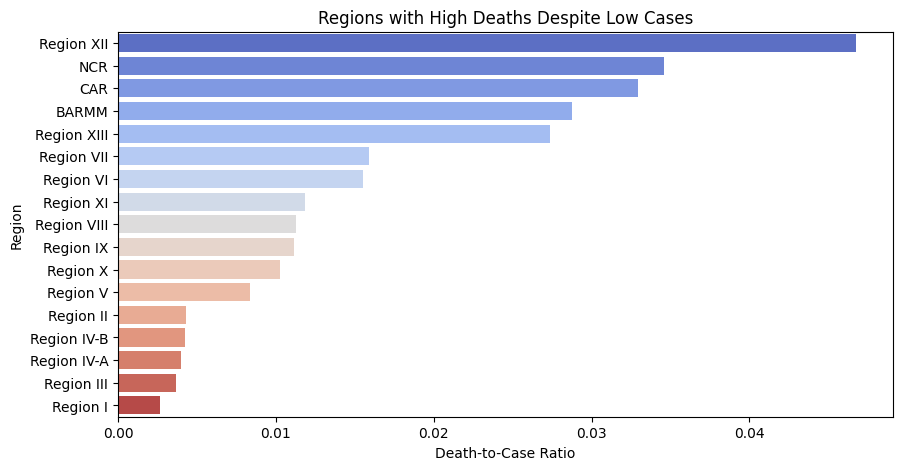

In [21]:
death_to_case_ratio = dengue_data.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
death_to_case_ratio['Death Increase Despite Low Cases'] = death_to_case_ratio['Dengue_Deaths'] / death_to_case_ratio['Dengue_Cases']
death_to_case_ratio = death_to_case_ratio.sort_values(by='Death Increase Despite Low Cases', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=death_to_case_ratio['Death Increase Despite Low Cases'], y=death_to_case_ratio.index, palette='coolwarm')
plt.title("Regions with High Deaths Despite Low Cases")
plt.xlabel("Death-to-Case Ratio")
plt.ylabel("Region")
plt.show()

<h1>11. Are some months more fatal compared to others?</h1>

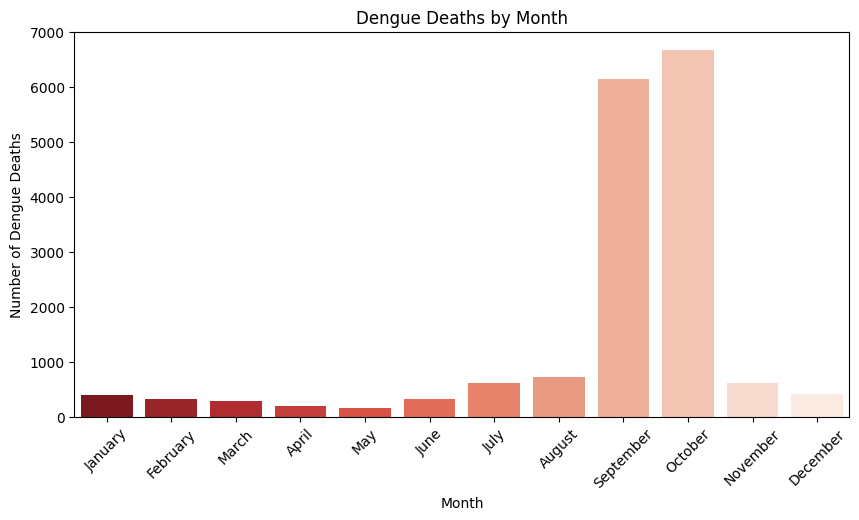

In [23]:
deaths_per_month = dengue_data.groupby('Month')['Dengue_Deaths'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
deaths_per_month = deaths_per_month.reindex(months_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=deaths_per_month.index, y=deaths_per_month.values, palette='Reds_r')
plt.title("Dengue Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Number of Dengue Deaths")
plt.xticks(rotation=45)
plt.show()


<h1>12. Are there specific months when dengue deaths exceed expectations?</h1>

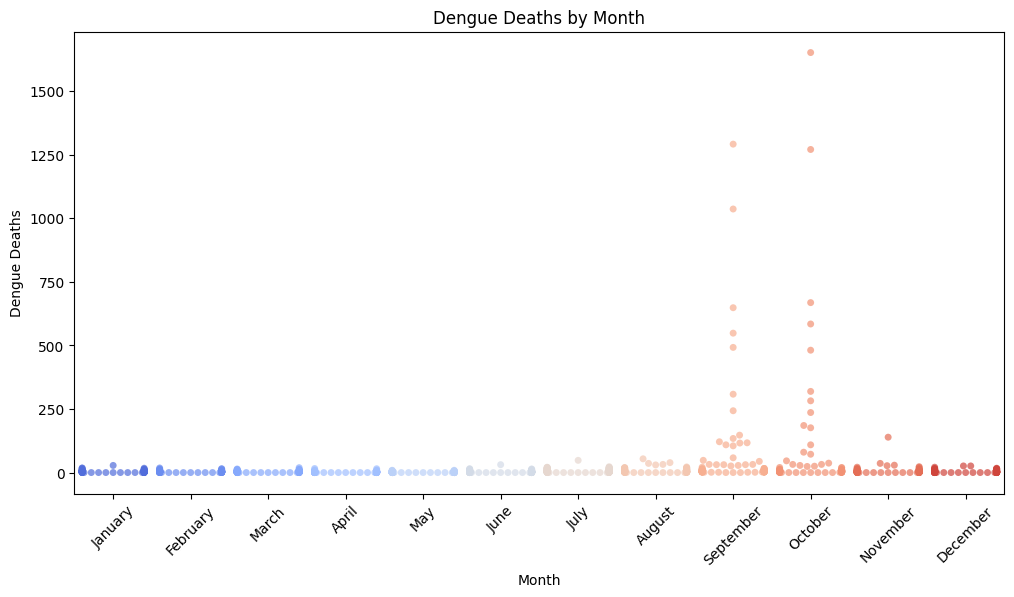

In [30]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x=dengue_data['Month'], y=dengue_data['Dengue_Deaths'], palette='coolwarm', order=months_order, alpha=0.7)
plt.title("Dengue Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Dengue Deaths")
plt.xticks(rotation=45)
plt.show()

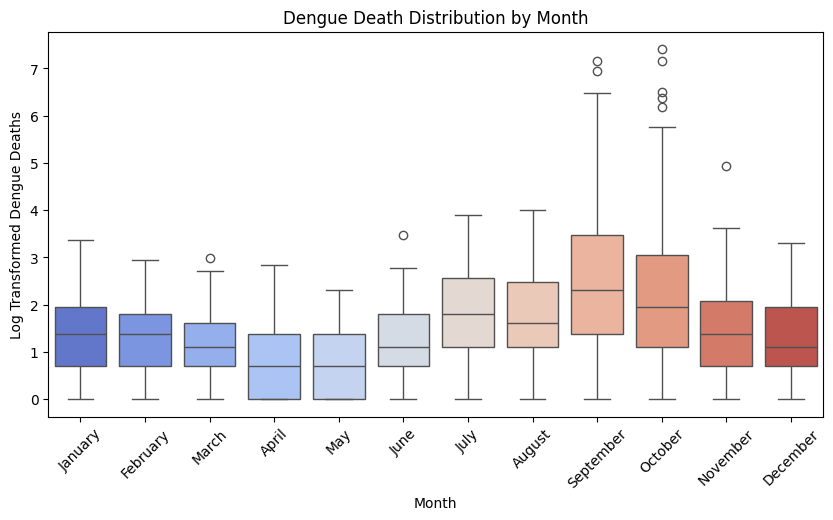

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dengue_data['Month'], y=np.log1p(dengue_data['Dengue_Deaths']), palette='coolwarm', order=months_order)
plt.title("Dengue Death Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Log Transformed Dengue Deaths")
plt.xticks(rotation=45)
plt.show()


<h1>13. Is there a significant correlation between the number of dengue cases and deaths?</h1>

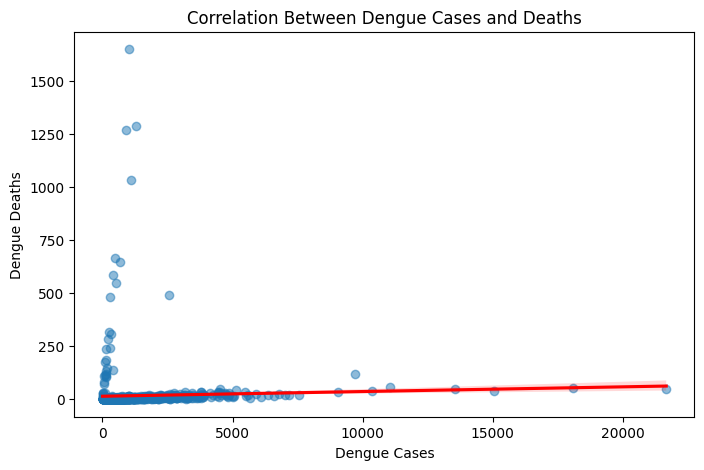

In [35]:
plt.figure(figsize=(8, 5))
sns.regplot(x=dengue_data['Dengue_Cases'], y=dengue_data['Dengue_Deaths'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Correlation Between Dengue Cases and Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>14. Do dengue cases and deaths show an increasing trend together?</h1>

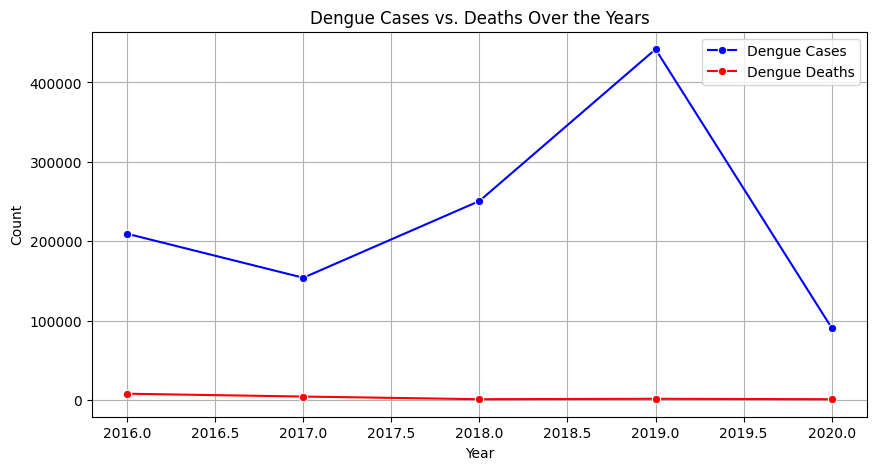

In [36]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=cases_per_year.index, y=cases_per_year.values, label="Dengue Cases", marker='o', color='blue')
sns.lineplot(x=deaths_per_year.index, y=deaths_per_year.values, label="Dengue Deaths", marker='o', color='red')
plt.title("Dengue Cases vs. Deaths Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

<h1> 15. Do dengue cases peak in the same months every year?</h1>

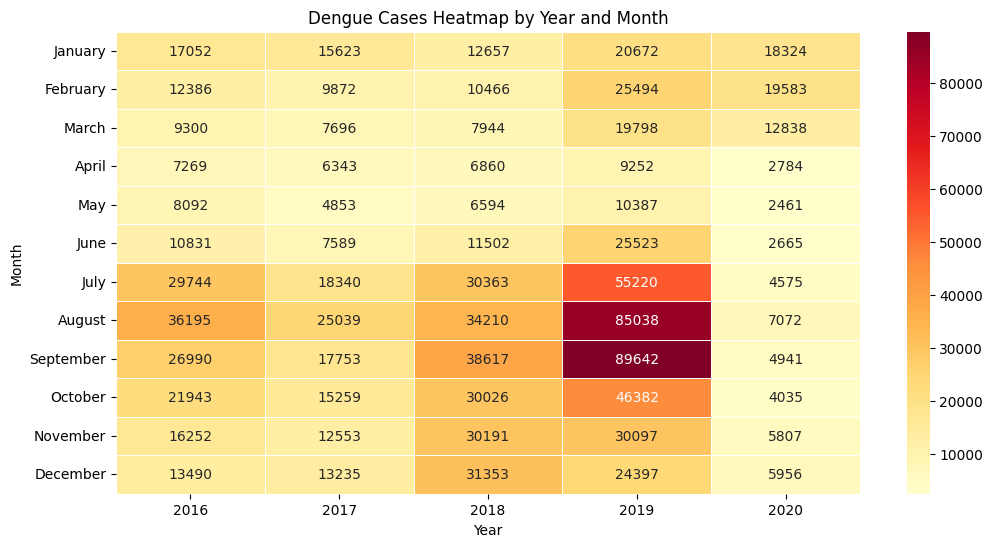

In [38]:
cases_per_month_year = dengue_data.pivot_table(index='Month', columns='Year', values='Dengue_Cases', aggfunc='sum')
cases_per_month_year = cases_per_month_year.reindex(months_order)

plt.figure(figsize=(12, 6))
sns.heatmap(cases_per_month_year, cmap='YlOrRd', linewidths=0.5, annot=True, fmt=".0f")
plt.title("Dengue Cases Heatmap by Year and Month")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()
